In [108]:
#pip install yfinance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

In [2]:
import yfinance as yf
import pandas_datareader as pdr
import datetime 
gold = pdr.get_data_yahoo("GC=F", 
                          start=datetime.datetime(2006, 1, 1), 
                          end=datetime.datetime(2022, 11, 6))

In [3]:
#gold = yf.Ticker("GC=F")
#print(gold.info['currency'])

In [4]:
gold.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,528.500000,518.599976,518.599976,530.700012,7.0,530.700012
2006-01-04,533.599976,533.500000,533.599976,533.900024,8.0,533.900024
2006-01-05,529.000000,526.000000,529.000000,526.299988,10.0,526.299988
2006-01-06,539.700012,539.700012,539.700012,539.700012,10.0,539.700012
2006-01-09,539.700012,539.700012,539.700012,549.099976,10.0,549.099976


In [5]:
gold.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-10,1875.599976,1823.900024,1842.699951,1871.500000,1490.0,1871.500000
2022-06-13,1873.800049,1818.699951,1873.800049,1828.000000,127.0,1828.000000
2022-06-14,1825.500000,1805.300049,1825.000000,1809.500000,536.0,1809.500000
2022-06-15,1839.000000,1810.800049,1814.099976,1815.300049,536.0,1815.300049
2022-06-16,1824.500000,1814.900024,1819.199951,1829.699951,87948.0,1829.699951


In [6]:
# calculate daily returns and add to the DataFrame
gold["return"] = gold["Adj Close"].pct_change()

In [7]:
gold.tail()

,High,Low,Open,Close,Volume,Adj Close,return
Date,,,,,,,
2022-06-10,1875.599976,1823.900024,1842.699951,1871.500000,1490.0,1871.500000,0.012278
2022-06-13,1873.800049,1818.699951,1873.800049,1828.000000,127.0,1828.000000,-0.023243
2022-06-14,1825.500000,1805.300049,1825.000000,1809.500000,536.0,1809.500000,-0.010120
2022-06-15,1839.000000,1810.800049,1814.099976,1815.300049,536.0,1815.300049,0.003205
2022-06-16,1824.500000,1814.900024,1819.199951,1829.699951,87948.0,1829.699951,0.007933


<AxesSubplot:title={'center':'gold since 2006-2022'}, xlabel='Date'>

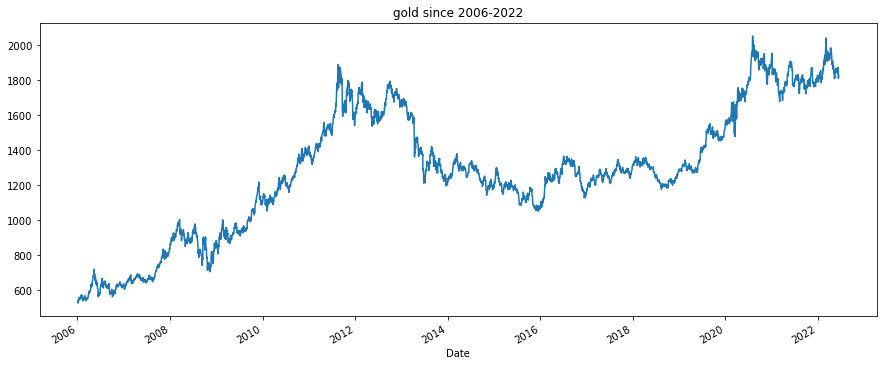

In [8]:
gold["Adj Close"].plot(figsize=(15,6), title="gold since 2006-2022")

In [9]:
import calendar
# Determine the weekday and add it as a new column to the DataFrame
gold["Weekday"] = gold.index.weekday.values
gold["Weekday"] = gold["Weekday"].apply(lambda x: calendar.day_name[x])
# Determine the month and add it as a new column to the DataFrame
gold["Month"] = gold.index.month.values
gold["Month"] = gold["Month"].apply(lambda x: calendar.month_name[x])
# Determine the year, convert it to string, and add it as a new column to the DataFrame
gold["Year"] = gold.index.year.values
gold["Year"] = gold["Year"].astype(str)
#gold.head(10)
gold.tail(10)

,High,Low,Open,Close,Volume,Adj Close,return,Weekday,Month,Year
Date,,,,,,,,,,
2022-06-03,1871.800049,1845.400024,1867.599976,1845.400024,53.0,1845.400024,-0.011305,Friday,June,2022
2022-06-06,1854.099976,1839.199951,1849.000000,1839.199951,142.0,1839.199951,-0.003360,Monday,June,2022
2022-06-07,1851.599976,1835.000000,1836.900024,1847.500000,1168.0,1847.500000,0.004513,Tuesday,June,2022
2022-06-08,1855.000000,1844.400024,1844.800049,1851.900024,218.0,1851.900024,0.002382,Wednesday,June,2022
2022-06-09,1850.099976,1837.900024,1846.099976,1848.800049,159.0,1848.800049,-0.001674,Thursday,June,2022
2022-06-10,1875.599976,1823.900024,1842.699951,1871.500000,1490.0,1871.500000,0.012278,Friday,June,2022
2022-06-13,1873.800049,1818.699951,1873.800049,1828.000000,127.0,1828.000000,-0.023243,Monday,June,2022
2022-06-14,1825.500000,1805.300049,1825.000000,1809.500000,536.0,1809.500000,-0.010120,Tuesday,June,2022
2022-06-15,1839.000000,1810.800049,1814.099976,1815.300049,536.0,1815.300049,0.003205,Wednesday,June,2022


In [10]:
# Mean return for each weekday
gold_weekday_mean = gold.groupby("Weekday").mean()
# Reorder
gold_weekday_mean = gold_weekday_mean.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
gold_weekday_mean

,High,Low,Open,Close,Volume,Adj Close,return
Weekday,,,,,,,
Monday,1286.183614,1273.077937,1280.344259,1279.517677,2497.215484,1279.517677,0.000569
Tuesday,1285.946471,1271.828117,1279.219766,1279.117410,5527.649412,1279.117410,0.000014
Wednesday,1285.218330,1272.000354,1278.771329,1278.627380,9085.189189,1278.627380,0.000258
Thursday,1287.810620,1273.137230,1280.595584,1280.631980,4381.261337,1280.631980,0.000365
Friday,1284.538816,1270.193955,1277.304716,1277.539420,4314.517533,1277.539420,0.000650


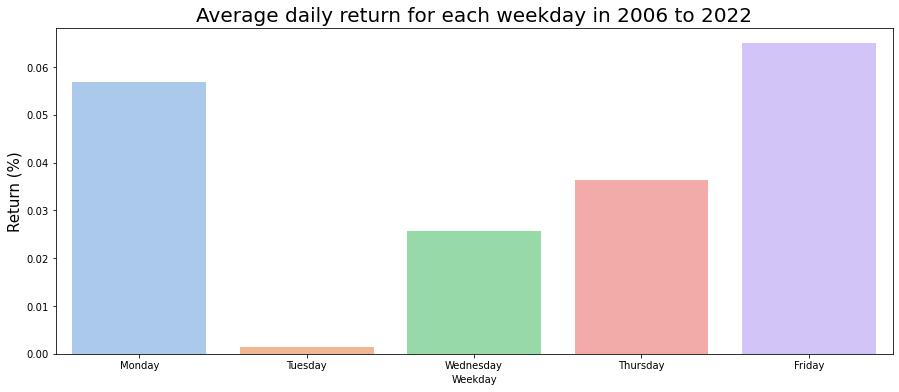

In [11]:
x = gold["Weekday"]
y = 100*gold_weekday_mean["return"]
# reorder
gold_weekday_mean = gold_weekday_mean.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
gold_weekday_mean
# barplot of the average return for each week day
import seaborn as sns
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=gold_weekday_mean.index, y=y, data=gold_weekday_mean)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average daily return for each weekday in 2006 to 2022", size=20)
plt.savefig('gold1.png')
plt.show()

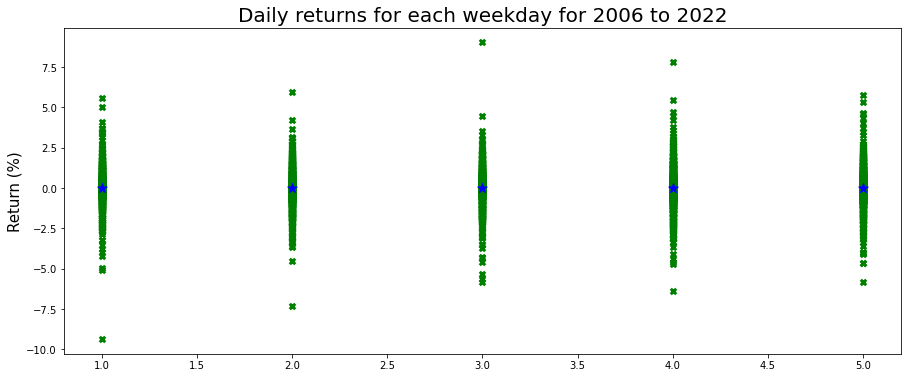

In [12]:
# Scatter plot of all observations to see the variations for each weekday
x = gold["Weekday"].values
y = 100*gold["return"].values
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
points = [[x[i], y[i]] for i in range(0,len(x))]
for i in range(0,len(points)):
 points[i][0] = days.index(points[i][0])+1
 
x = [points[i][0] for i in range(0,len(points))]
y = [points[i][1] for i in range(0,len(points))]
fig = plt.figure(figsize=(15,6))
ax = plt.scatter(x, y, color="green", linewidths=3, marker='x', s=30)
ax = plt.scatter([1,2,3,4,5], gold_weekday_mean["return"], color="blue", marker="*", s=100)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Daily returns for each weekday for 2006 to 2022", size=20)
plt.savefig('gold2.png')
plt.show()

In [13]:
# Volatility of the returns for each weekday
gold["return"]= gold["return"]
weekday_vol = gold[["Weekday", "return"]].groupby("Weekday").std()
print(weekday_vol)
print()
# Number of weekdays
print(gold[["Weekday", "return"]].groupby("Weekday").count())

             return
Weekday            
Friday     0.011730
Monday     0.011392
Thursday   0.012527
Tuesday    0.011108
Wednesday  0.011075

           return
Weekday          
Friday        827
Monday        775
Thursday      838
Tuesday       849
Wednesday     851


In [14]:
# Perform statistical analysis
from scipy import stats
average_return = gold_weekday_mean["return"].mean()
for day in gold_weekday_mean.index.values:
    sample = np.array(gold[gold.Weekday == day]["return"])
    print(day,":", stats.ttest_1samp(sample, average_return))

Monday : Ttest_1sampResult(statistic=0.4846584216742253, pvalue=0.6280557883475715)
Tuesday : Ttest_1sampResult(statistic=nan, pvalue=nan)
Wednesday : Ttest_1sampResult(statistic=-0.2989402957121553, pvalue=0.7650586716044443)
Thursday : Ttest_1sampResult(statistic=-0.015119106787931526, pvalue=0.987940760700928)
Friday : Ttest_1sampResult(statistic=0.6832241228904831, pvalue=0.49465682116759757)


C:\Users\ann_1\AppData\Local\Temp/ipykernel_12864/1592493003.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  gold_year = gold[str(year)]
C:\Users\ann_1\AppData\Local\Temp/ipykernel_12864/1592493003.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  gold_year = gold[str(year)]
C:\Users\ann_1\AppData\Local\Temp/ipykernel_12864/1592493003.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  gold_year = gold[str(year)]
C:\Users\ann_1\AppData\Local\Temp/ipykernel_12864/1592493003.py:12:

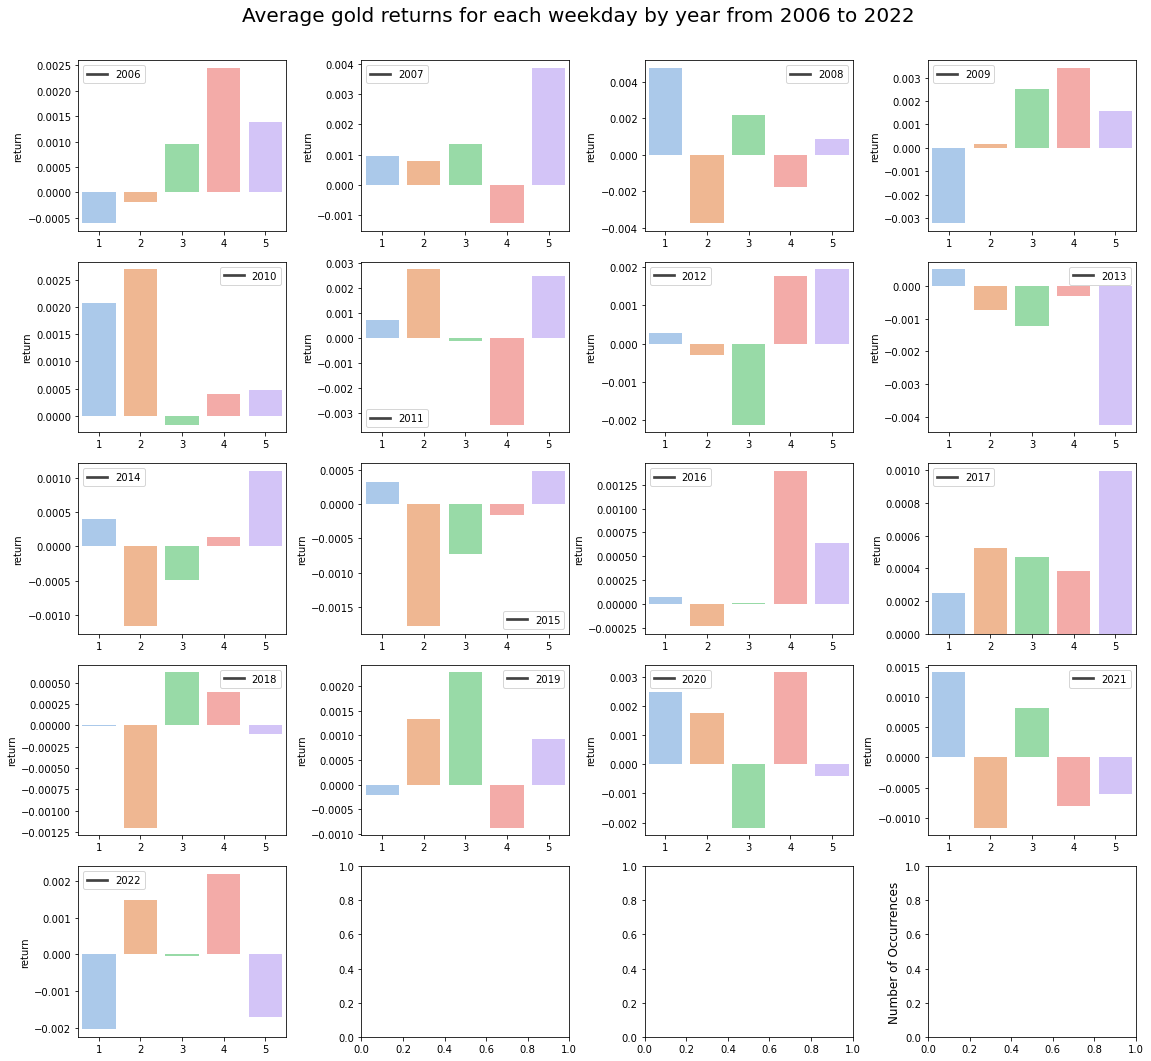

In [16]:
years = range(2006, 2023)
nr_rows = 5
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)
axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])

count = 0
for year in years:
    gold_year = gold[str(year)]
    # Mean return for each weekday
    gold_year = gold_year.groupby("Weekday").mean()
    # reorder
    gold_year = gold_year.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
    # plot
    sns.barplot(x=[1,2,3,4,5], y="return", data=gold_year, ax=axis[count])
    plt.ylabel('Number of Occurrences', fontsize=12)
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average gold returns for each weekday by year from 2006 to 2022", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('gold3.png')
plt.show()

In [17]:
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]


# add 1 to the return columm and only keep the relevant columns
gold["return"] = gold["return"] + 1
gold_month = gold[["return", "Month", "Year"]]
# subtract 1 again to get back the return
gold["return"] = gold["return"] - 1

# group by Month and multiply the returns+1 together for each month, subtracting 1 at the end
gold_month = gold_month.groupby(["Month", "Year"]).prod()-1
# convert the returns to percentage
gold_month["return"] = gold_month["return"]


gold_month.reset_index(inplace=True)
gold_month.Month = gold_month.Month.astype("category")
gold_month.Month.cat.set_categories(months, inplace=True)
gold_month.sort_values(["Month"], inplace=True)
gold_month

C:\Users\ann_1\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,Month,Year,return
73,January,2013,-0.008479
68,January,2008,0.105162
69,January,2009,0.049457
70,January,2010,-0.011139
71,January,2011,-0.061431
...,...,...,...
37,December,2010,0.026065
36,December,2009,-0.072729
33,December,2006,-0.018086
41,December,2014,0.007403


In [18]:
# sort the years as well
gold_returns = pd.DataFrame(columns=gold_month.columns)
count = 0
for i in range(0,12):
    gold_year = gold_month[24*i:24*(i+1)]
    gold_year.Year = gold_year.Year.astype("category")
    gold_year.Year.cat.set_categories([str(year) for year in years], inplace=True)
    gold_year.sort_values(["Year"], inplace=True)
    gold_returns = pd.concat([gold_returns, gold_year], ignore_index=True)
    count = count + 1

gold_returns

C:\Users\ann_1\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\ann_1\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
C:\Users\ann_1\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,Month,Year,return
0,January,2006,0.075561
1,February,2007,0.026687
2,January,2007,0.026448
3,January,2008,0.105162
4,February,2009,0.015313
...,...,...,...
193,December,2007,0.067374
194,December,2009,-0.072729
195,December,2010,0.026065
196,December,2011,-0.102950


In [19]:
# calculate the average monthly return for all months
gold_month_returns = gold_returns.groupby(["Month"]).mean()

# reorder
gold_month_returns = gold_month_returns.reindex(months)
gold_month_returns

,return
Month,
January,0.032832
February,0.012782
March,-0.004933
April,0.014406
May,-0.001360
June,-0.003425
July,0.015220
August,0.017833
September,-0.006350


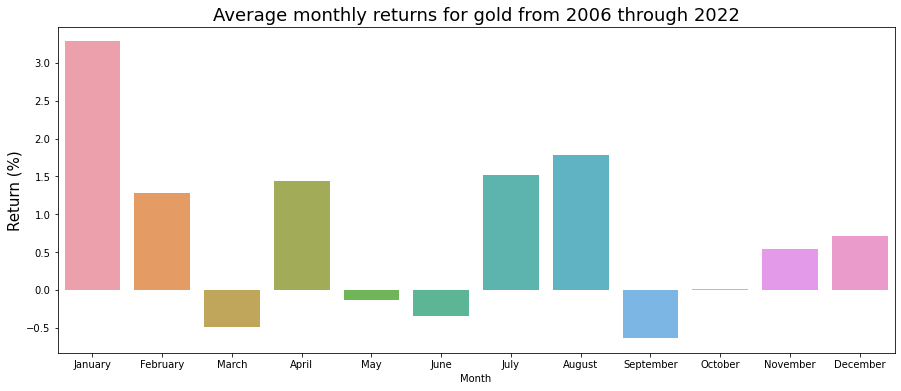

In [22]:
# plot the barplot of the average monthly returns in percentage
import seaborn as sns
#sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=gold_month_returns.index, y=100*gold_month_returns["return"], alpha=0.9)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average monthly returns for gold from 2006 through 2022", size=18)
plt.savefig('gold4.png')
plt.show()

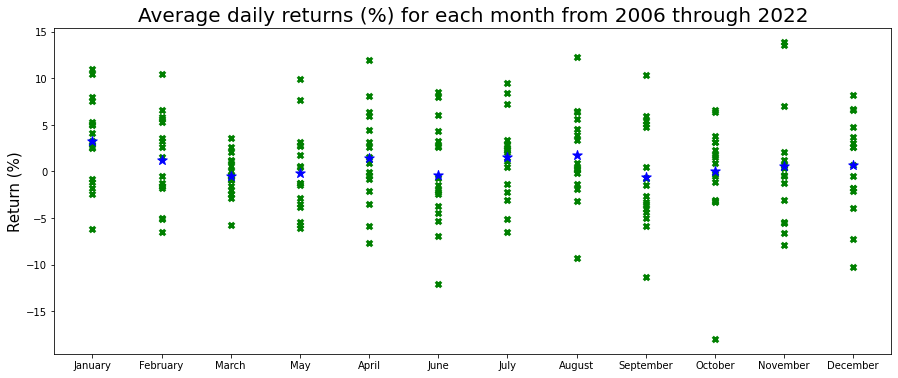

In [23]:
# scatter plot of the monthly returns in percentage
fig = plt.figure(figsize=(15,6))
ax = plt.scatter(x=gold_returns["Month"], y=100*gold_returns["return"], color="green", linewidths=3, marker="x", s=30)
ax = plt.scatter(months, 100*gold_month_returns, color="blue", marker="*", s=100)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average daily returns (%) for each month from 2006 through 2022", size=20)
plt.savefig('gold5.png')
plt.show()

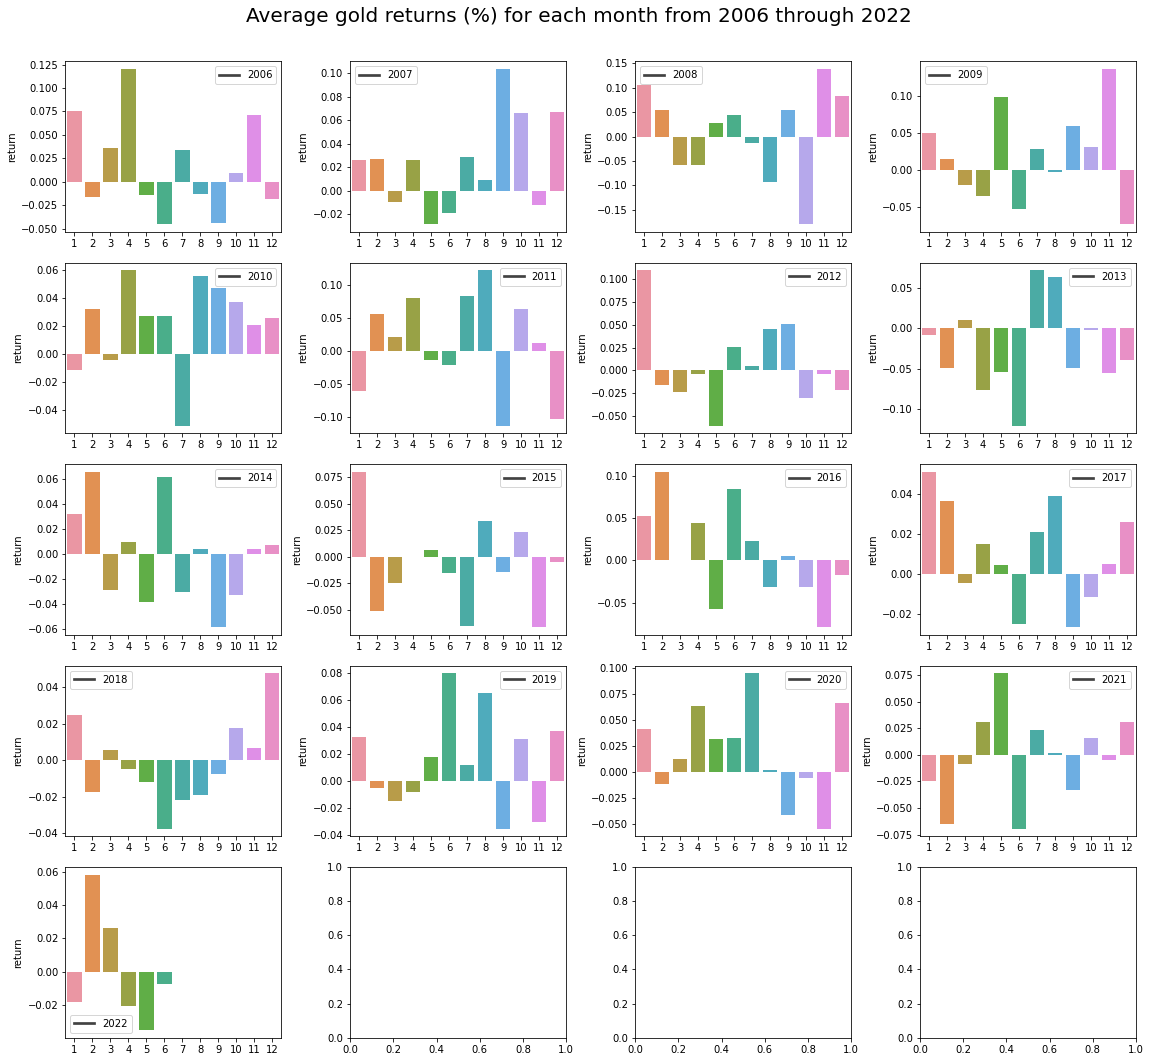

In [25]:
# Plot of the monthly return for each year from 1996 through 2019 in percentage
years = range(2006, 2023)
nr_rows = 5
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])

count = 0
for year in years:
    gold_year = gold_returns[gold_returns.Year == str(year)]
    # Mean return for each weekday
    gold_year = gold_year.groupby("Month").mean()
    # reorder
    gold_year = gold_year.reindex(["January", "February", "March", "April",
                                   "May", "June", "July", "August", "September", "October", "November", "December"])
    # plot
    axis[count] = sns.barplot(x=[1,2,3,4,5,6,7,8,9,10,11,12], y="return", data=gold_year, ax=axis[count])
    #axis[count].ylabel("Return (%)")
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average gold returns (%) for each month from 2006 through 2022", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('gold6.png')
plt.show()

In [26]:
# average monthly return over all months
average_return = gold_month_returns.mean()
average_return[0]

0.007474962251066165

In [27]:
from scipy import stats

for month in months:
    sample = gold_returns[gold_returns.Month == month]["return"]
    print(month,":", stats.ttest_1samp(sample, average_return))
    print()

January : Ttest_1sampResult(statistic=return    2.243924
dtype: float64, pvalue=array([0.0393374]))

February : Ttest_1sampResult(statistic=return    0.46328
dtype: float64, pvalue=array([0.64940301]))

March : Ttest_1sampResult(statistic=return   -2.229296
dtype: float64, pvalue=array([0.04047523]))

April : Ttest_1sampResult(statistic=return    0.569999
dtype: float64, pvalue=array([0.57659544]))

May : Ttest_1sampResult(statistic=return   -0.808464
dtype: float64, pvalue=array([0.43068131]))

June : Ttest_1sampResult(statistic=return   -0.811977
dtype: float64, pvalue=array([0.42872028]))

July : Ttest_1sampResult(statistic=return    0.686676
dtype: float64, pvalue=array([0.50276485]))

August : Ttest_1sampResult(statistic=return    0.840082
dtype: float64, pvalue=array([0.41405254]))

September : Ttest_1sampResult(statistic=return   -0.986107
dtype: float64, pvalue=array([0.33972058]))

October : Ttest_1sampResult(statistic=return   -0.512831
dtype: float64, pvalue=array([0.6155386

In [28]:
# mean return of each day of the month (note that 31 will have a smaller sample size)
day_of_month_return = gold[["return"]].groupby(gold.index.day).mean()
day_of_month_return.head()

,return
Date,
1,0.000518
2,0.001188
3,0.000842
4,-0.000368
5,0.000189


C:\Users\ann_1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


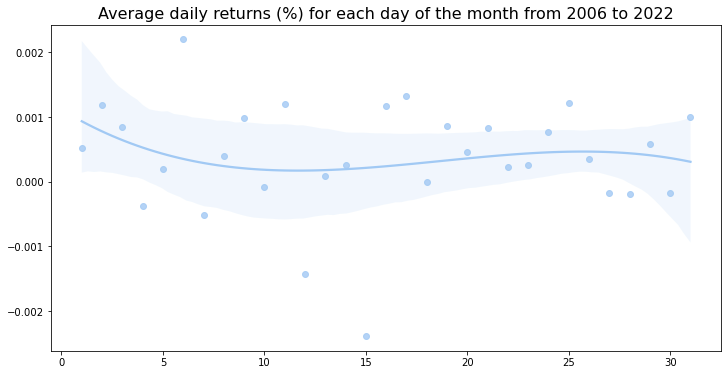

In [29]:
ax, fig = plt.subplots(figsize=(12,6))
ax = sns.regplot(day_of_month_return.index.values, day_of_month_return.values, order=3)
ax = plt.title("Average daily returns (%) for each day of the month from 2006 to 2022", size=16)
plt.savefig('gold7.png')
plt.show()

In [30]:
# group by year
year_return = gold[["return"]].groupby(gold.index.year).mean()
year_return.head()

,return
Date,
2006,0.000835
2007,0.001140
2008,0.000408
2009,0.000949
2010,0.001085


In [31]:
day_returns = pd.DataFrame(index=range(1,32))

for year in years:
    day_returns[str(year)] = gold[str(year)]["return"].groupby(gold[str(year)].index.day).mean()

C:\Users\ann_1\AppData\Local\Temp/ipykernel_12864/2072416219.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  day_returns[str(year)] = gold[str(year)]["return"].groupby(gold[str(year)].index.day).mean()


In [32]:
# daily average over all days from 1996 through 2019
average_return = day_of_month_return.mean()
average_return[0]

days = range(0,31)
for day in days:
    print(day+1,":", stats.ttest_1samp(day_returns.iloc[day], average_return))
    print()

1 : Ttest_1sampResult(statistic=return    0.221902
dtype: float64, pvalue=array([0.82719769]))

2 : Ttest_1sampResult(statistic=return    0.761206
dtype: float64, pvalue=array([0.4576073]))

3 : Ttest_1sampResult(statistic=return    0.270185
dtype: float64, pvalue=array([0.79047166]))

4 : Ttest_1sampResult(statistic=return   -0.622296
dtype: float64, pvalue=array([0.5425145]))

5 : Ttest_1sampResult(statistic=return    0.069538
dtype: float64, pvalue=array([0.94542303]))

6 : Ttest_1sampResult(statistic=return    1.871146
dtype: float64, pvalue=array([0.07972675]))

7 : Ttest_1sampResult(statistic=return   -0.770817
dtype: float64, pvalue=array([0.45204851]))

8 : Ttest_1sampResult(statistic=return    0.11257
dtype: float64, pvalue=array([0.91177187]))

9 : Ttest_1sampResult(statistic=return    0.356831
dtype: float64, pvalue=array([0.72588063]))

10 : Ttest_1sampResult(statistic=return   -0.495535
dtype: float64, pvalue=array([0.62695924]))

11 : Ttest_1sampResult(statistic=return   

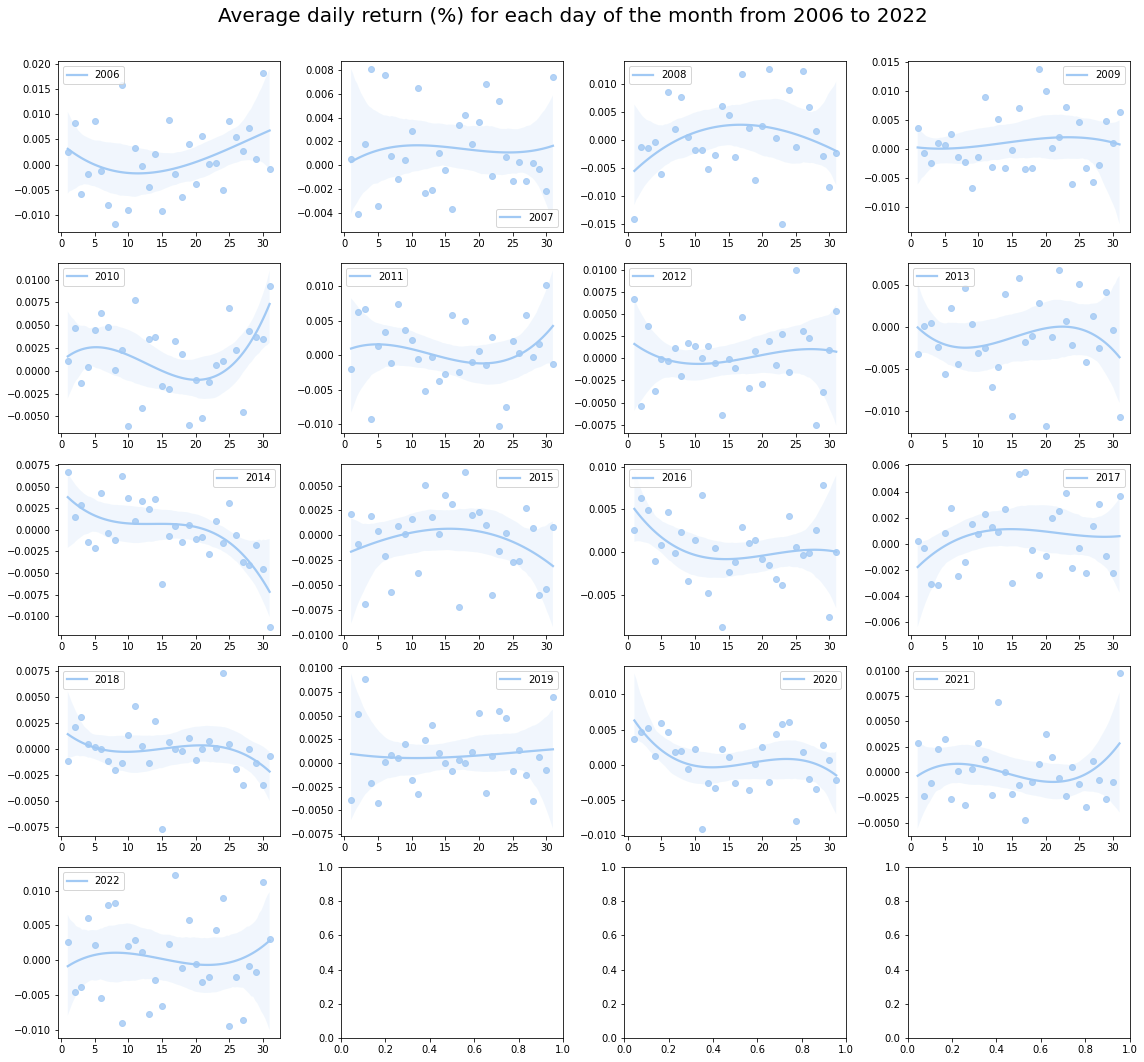

In [33]:
nr_rows = 5
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])

count = 0
for year in years:
    returns = day_returns[str(year)]
    axis[count] = sns.regplot(x=returns.index.values, y=returns.values, ax=axis[count], order=3)
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average daily return (%) for each day of the month from 2006 to 2022", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('gold8.png')
plt.show()